# 2.1 Splitting dataset (10 marks)
Split the dataset into training dataset and testing dataset. Train to test ratio should be 80:20.
# 2.2 Build models (40 marks)
As mentioned above, each individual in a group has to build a classification model. The models can
be of any type, and you can use any existing Python (or R) libraries (ex: Scikit-Learn) to build them.
One out of the two/three models MUST be a variant of the boosting tree (ex: XGBoost, AdaBoost,
LightGBM). The other one/two models could include SVMs, KNN, Decision Trees, Random Forests,
MLPs, Naive Bayes or any other classifiers that you think could be appropriate for the problem
statement.
Save each trained model to your disk (if you choose .pkl file, the models would look like
xgb_classifier.pkl, rf_classifier.pkl), and include the models in submission.
# 2.3 Evaluation (30 marks)
Load the saved models from task 2.2. Once loaded, evaluate the models on both the training set and
the test set. Choose appropriate metrics to do the evaluation. Report the scores of your metrics for
the training and the test set and interpret them. Which of the metric(s) are most important for this
classification problem?
# 2.4 Overfitting (20 marks)
It is not uncommon for the classification models to overfit. Do you observe overfitting in the models
that you trained? How do you check for overfitting? Explain steps taken by using plots and/or metrics 
evaluated. You can vary the values of at least one hyperparameter, train models for different values
of that hyperparameter and then compare the performance metric on training and test dataset.

# `Please Start running the code from here`

In [1]:
!curl https://raw.githubusercontent.com/aamritpa/CMPT-Data-Covid-19/master/finalDataPart1.csv --output ./finalDataPart1.csv
!curl https://raw.githubusercontent.com/aamritpa/CMPT-Data-Covid-19/master/finalDataPart2.csv --output ./finalDataPart2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 57.6M    0  5484    0     0   6787      0  2:28:27 --:--:--  2:28:27  6846
 32 57.6M   32 18.5M    0     0  13.2M      0  0:00:04  0:00:01  0:00:03 13.3M
100 57.6M  100 57.6M    0     0  24.2M      0  0:00:02  0:00:02 --:--:-- 24.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 57.0M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 10 57.0M   10 6147k    0     0  3723k      0  0:00:15  0:00:01  0:00:14 3750k
 56 57.0M   56 32.0M    0     0  12.0M      0  0:00:04  0:00:02  0:00:02 12.1M
100 57.0M  100 57.0M    0     0  16.8M      0  0:0

In [2]:
# Importing files
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [7]:
def XGB(X, y, folds):
    # doing 80:20 split for train and test
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)
    
    print("\nTraining the Model !")

    ##  max_depth = 6
    ##  max_depth = 7
    ##  max_depth = 8
    ##  max_depth = 9
    ##  max_depth = 10

    # preparing model pipeline
    model = make_pipeline(
        MinMaxScaler(),
        XGBClassifier(max_depth = 10)
    )
    
    # Training the model
    model.fit(X_train, y_train)
    print("\nModel Trained succesfully !\n")
    
    # Save the Model
    print("\n\nSaving the Model !\n")
    target = "XGB.pkl"
    pickle.dump(model,open(target, "wb"))
    print("Model Succsesfully saved as ",target,"!")
    
    #Load the model 
    print("\nLoading the saved Model !\n")
    source = "XGB.pkl"
    Clf = pickle.load(open(source, "rb"))
    print("\nModel Succsesfully loaded from ", target,"!\n")

    # Clf score on train data
    trainScore = Clf.score(X_train, y_train) 
    
    # Clf score on test data
    validationScore = Clf.score(X_valid, y_valid)

    # Clf predict and predict_proba on test data
    predictY = Clf.predict(X_valid) 
    predictedProbability = Clf.predict_proba(X_valid)

    # lastly cross validation score on n-folds
    if folds != 0:
        CrossValidationMean = np.mean(cross_val_score(Clf, X, y, cv = folds))
    else:
        CrossValidationMean = "Null for 0 folds !"
    
    # returning y valid for roc score and confusion matrix
    return y_valid, trainScore, validationScore, predictY, predictedProbability, CrossValidationMean

def naive_bayes(X, y, folds):
    # doing 80:20 split for train and test
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)
    
    print("\nTraining the Model !")
    # preparing model pipeline
    model = make_pipeline(
        MinMaxScaler(),
        GaussianNB()
    )
    
    # Training the model
    model.fit(X_train, y_train)
    print("\nModel Trained succesfully !")

    # Save the Model
    print("\nSaving the Model !\n")
    target = "NB.pkl"
    pickle.dump(model,open(target, "wb"))
    print("Model Succsesfully saved as ",target,"!")

    #Load the model 
    print("\nLoading the saved Model !")
    source = "NB.pkl"
    Clf = pickle.load(open(source, "rb"))
    print("\nModel Succsesfully loaded from ", target,"!\n")

    # Clf score on train data
    trainScore = Clf.score(X_train, y_train) 
    
    # Clf score on test data
    validationScore = Clf.score(X_valid, y_valid)

    # Clf predict and predict_proba on test data
    predictY = Clf.predict(X_valid) 
    predictedProbability = Clf.predict_proba(X_valid)

    # lastly cross validation score on n-folds
    if folds != 0:
        CrossValidationMean = np.mean(cross_val_score(Clf, X, y, cv = folds))
    else:
        CrossValidationMean = "Null for 0 folds !"
    # returning y valid for roc score and confusion matrix
    return y_valid, trainScore, validationScore, predictY, predictedProbability, CrossValidationMean

def random_forest(X, y, folds):
    # doing 80:20 split for train and test
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)
    
    ## n_estimators=100, max_depth=12
    ## n_estimators=200, max_depth=12
    ## n_estimators=300, max_depth=12
    ## n_estimators=400, max_depth=12
    ## n_estimators=500, max_depth=12

    print("\nTraining the Model !")
    # preparing model pipeline
    
    model = make_pipeline(
        MinMaxScaler(),
        RandomForestClassifier(n_estimators=100, max_depth=12)
    )

    
    # Training the model
    model.fit(X_train, y_train)
    print("\nModel Trained succesfully !\n")
    # Save the Model
    print("\nSaving the Model !\n")
    target = "RandomForestModel.pkl"
    pickle.dump(model,open(target, "wb"))
    print("Model Succsesfully saved as ", target,"!")
    
    #Load the model 
    print("\nLoading the saved Model !\n")
    source = "RandomForestModel.pkl"
    Clf = pickle.load(open(source, "rb"))
    print("Model Succsesfully loaded from ", target,"!\n")

    # Clf score on train data
    trainScore = Clf.score(X_train, y_train) 
    
    # Clf score on test data
    validationScore = Clf.score(X_valid, y_valid)

    # Clf predict and predict_proba on test data
    predictY = Clf.predict(X_valid) 
    predictedProbability = Clf.predict_proba(X_valid)

    # lastly cross validation score on n-folds
    if folds != 0:
        CrossValidationMean = np.mean(cross_val_score(Clf, X, y, cv = folds))  
    else:
        CrossValidationMean = "Null for 0 folds !"
    # returning y valid for roc score and confusion matrix
    return y_valid, trainScore, validationScore, predictY, predictedProbability, CrossValidationMean

In [8]:
def plotConfusionMatrix(conf_mat, model):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.title('Confusion matrix', fontsize=18,fontweight = 'bold')
    plt.xlabel('Predicted label', fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel('True label', fontsize=16,fontweight = 'bold').set_color('black')
    plt.show()

In [9]:
def CallModel(X, y, model, folds):
    y_valid, trainScore, validationScore, predictY, predictedProbability, CrossValidationMean = model(X, y, folds)
    print(f"Train Accuracy       : {trainScore * 100:.2f}%")
    print(f"Test Accuracy        : {validationScore * 100:.2f}%")
    if folds == 0:
        print(f"{folds}-fold Accuracy     :", CrossValidationMean)
    else:
        print(f"{folds}-fold Accuracy     : {CrossValidationMean * 100:.2f}%","\n\n")

    matrix = confusion_matrix(y_valid, predictY)
    print(matrix)
    plotConfusionMatrix(matrix, "model")
    print(pd.DataFrame(classification_report(predictY, y_valid, output_dict=True)))

In [10]:
def to_timestamp(d):
    return d.timestamp()

import datetime


def makeDatetime(data):
    return datetime.datetime.strptime(data, '%Y-%m-%d')


    
def DataImportAndProcessing():
    # Importing Data
    data1 = pd.read_csv('finalDataPart1.csv')
    data2 = pd.read_csv('finalDataPart2.csv')
    
    # Appending IF NEEDED
    data = data1.append(data2)
    data=data.reset_index(drop=True)
    data = data.drop(columns=['index'])
    data['date_confirmation'] = data['date_confirmation'].apply(makeDatetime)
    data['date_confirmation'] = data['date_confirmation'].apply(to_timestamp) 
    # Encoding Label i.e outcome column
    data['outcome'].replace({'nonhospitalized':0, 'recovered':1, 'hospitalized':2, 'deceased':3},inplace=True)

    # Introducing dummies into data to get rid of all the categorical data
    encodedCountry = pd.get_dummies(data['country'])
    encodedProvince = pd.get_dummies(data['province'])
    encodedSex = pd.get_dummies(data['sex'])
    data = pd.concat([data, encodedSex, encodedProvince,encodedCountry], axis=1)

    print("length of filled data: ", len(data))
    
    
    
    data = data.drop(columns=['province','country','source', 'additional_information', 'sex'])
    
    return data



length of filled data:  557340


--------------------------------------------------------------------


Calling Gaussian Naive Bayes


Training the Model !

Model Trained succesfully !

Saving the Model !

Model Succsesfully saved as  NB.pkl !

Loading the saved Model !

Model Succsesfully loaded from  NB.pkl !

Train Accuracy       : 42.75%
Test Accuracy        : 38.50%
0-fold Accuracy     : Null for 0 folds !
[[69  0  0  1]
 [ 0  5  1 31]
 [ 0 10  3 80]
 [ 0  0  0  0]]


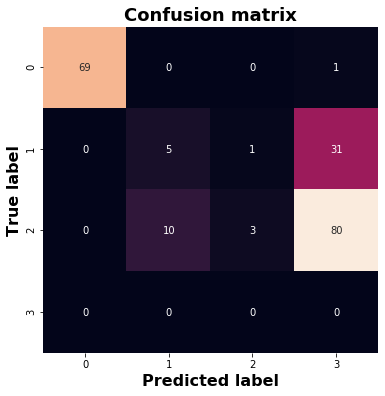

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   0          1         2      3  accuracy   macro avg  \
precision   0.985714   0.135135  0.032258    0.0     0.385    0.288277   
recall      1.000000   0.333333  0.750000    0.0     0.385    0.520833   
f1-score    0.992806   0.192308  0.061856    0.0     0.385    0.311742   
support    69.000000  15.000000  4.000000  112.0     0.385  200.000000   

           weighted avg  
precision      0.350852  
recall         0.385000  
f1-score       0.358178  
support      200.000000  


--------------------------------------------------------------------


Calling Random Forest


Training the Model !

Model Trained succesfully !


Saving the Model !

Model Succsesfully saved as  RandomForestModel.pkl !

Loading the saved Model !

Model Succsesfully loaded from  RandomForestModel.pkl !

Train Accuracy       : 84.00%
Test Accuracy        : 81.00%
0-fold Accuracy     : Null for 0 folds !
[[70  0  0]
 [ 2  4 31]
 [ 0  5 88]]


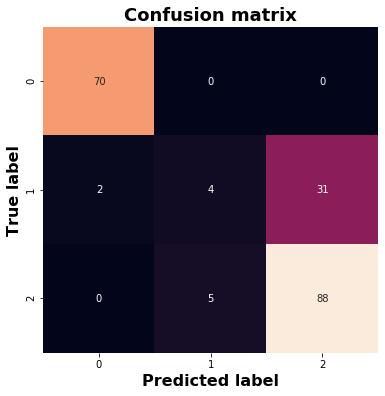

                   0         1           2  accuracy   macro avg  weighted avg
precision   1.000000  0.108108    0.946237      0.81    0.684782      0.927876
recall      0.972222  0.444444    0.739496      0.81    0.718721      0.810000
f1-score    0.985915  0.173913    0.830189      0.81    0.663339      0.856718
support    72.000000  9.000000  119.000000      0.81  200.000000    200.000000


--------------------------------------------------------------------


Calling XGB Classifier


Training the Model !

Model Trained succesfully !



Saving the Model !

Model Succsesfully saved as  XGB.pkl !

Loading the saved Model !


Model Succsesfully loaded from  XGB.pkl !

Train Accuracy       : 95.25%
Test Accuracy        : 78.50%
0-fold Accuracy     : Null for 0 folds !
[[70  0  0  0]
 [ 2 22 13  0]
 [ 0 27 65  1]
 [ 0  0  0  0]]


                   0          1          2    3  accuracy   macro avg  \
precision   1.000000   0.594595   0.698925  0.0     0.785    0.573380   
recall      0.972222   0.448980   0.833333  0.0     0.785    0.563634   
f1-score    0.985915   0.511628   0.760234  0.0     0.785    0.564444   
support    72.000000  49.000000  78.000000  1.0     0.785  200.000000   

           weighted avg  
precision      0.778256  
recall         0.785000  
f1-score       0.776770  
support      200.000000  


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
def main():
    data = DataImportAndProcessing()
    X = data.drop(columns=['outcome']).to_numpy()
    y = data['outcome'].to_numpy()
    
    print('\n\n--------------------------------------------------------------------\n\n')
    print('Calling Gaussian Naive Bayes\n')
    CallModel(X, y, naive_bayes, 0)
    
    print('\n\n--------------------------------------------------------------------\n\n')
    print('Calling Random Forest\n')
    CallModel(X, y, random_forest, 0)

    print('\n\n--------------------------------------------------------------------\n\n')
    print('Calling XGB Classifier\n')
    CallModel(X, y, XGB, 0)

main()